In [1]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt

In [2]:
linear_model = ctypes.CDLL("modele/linear/target/release/liblinear_classification.so")

linear_model.LM_init.argtypes = [
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_double
]
linear_model.LM_init.restype = ctypes.POINTER(ctypes.c_void_p)

linear_model.LM_free.argtypes = [ctypes.POINTER(ctypes.c_void_p)]

linear_model.LM_train.argtypes = [
    ctypes.POINTER(ctypes.c_void_p),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_size_t,
    ctypes.c_size_t
]

linear_model.LM_predict.argtypes = [
    ctypes.POINTER(ctypes.c_void_p),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_size_t,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]

In [6]:
learning_rate = 0.01
weights = np.array([0.1, -0.2, 0.3, -0.4], dtype=np.float64, order='C')
bias = 1
epochs = 1000

# Initialisation du modèle
model = linear_model.LM_init(learning_rate, weights, weights.size, bias)

flatten vector [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


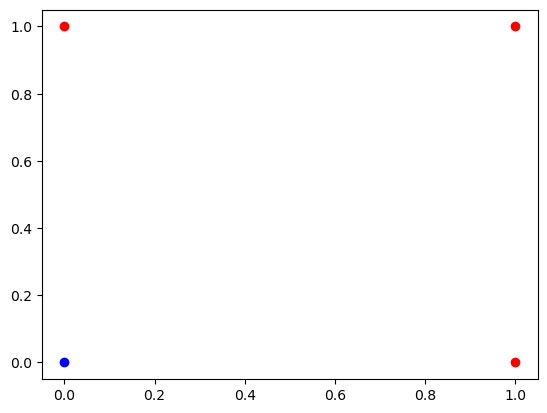

<Figure size 640x480 with 0 Axes>

In [7]:
# XOR test
x_train = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
], dtype=np.float64, order='C')
x_train_flatten = x_train.flatten()
y_train = np.array([-1.0, 1.0, 1.0, -1.0], dtype=np.float64, order='C')
n_samples, n_features = 3, 2

print(f"flatten vector {x_train}")
plt.scatter(x_train[0, 0], x_train[0, 1], color='blue')
plt.scatter(x_train[1:4,0], x_train[1:4,1], color='red')
plt.show()
plt.clf()

In [8]:
linear_model.LM_train(model, x_train_flatten, y_train, n_samples, n_features, epochs)

# x_test = np.array([
#     [1.0, 1.0],
#     [0.0, 1.0],
#     [1.0, 0.0],
#     [0.0, 0.0]
# ], dtype=np.float64).flatten()

n_samples_new = x_train.shape[0]
predictions = np.zeros(n_samples_new, dtype=np.float64)

linear_model.LM_predict(
    model,
    x_train_flatten,
    n_samples_new,
    n_features,
    predictions
)

print(predictions)

Epoch 0 completed
[0.03532394 0.64546973 0.65096668 0.98933122]
Epoch 100 completed
Epoch 200 completed
Epoch 300 completed
Epoch 400 completed
Epoch 500 completed
Epoch 600 completed
Epoch 700 completed
Epoch 800 completed
Epoch 900 completed


In [6]:
linear_model.LM_free(model)

0